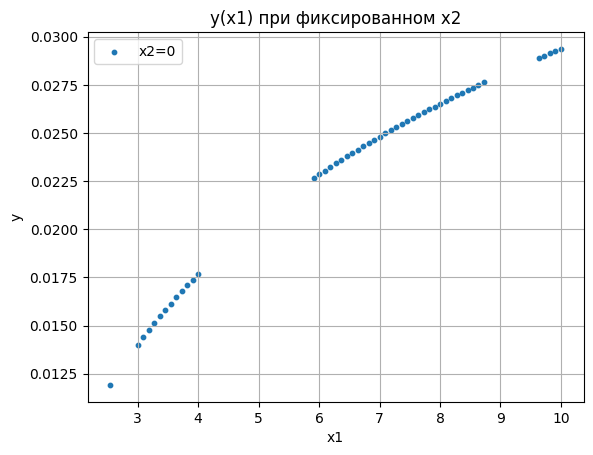

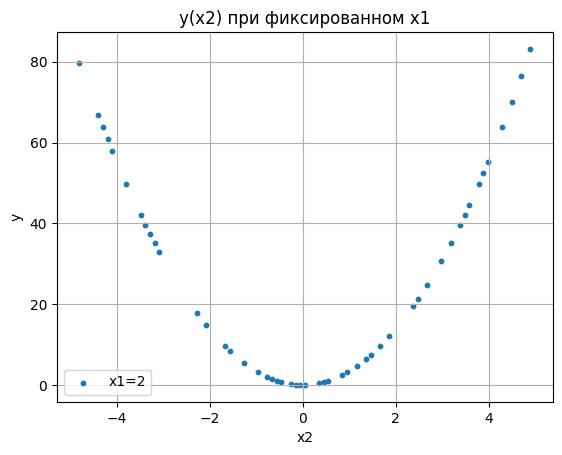

x1: mean=5.50, min=1.00, max=10.00
x2: mean=0.00, min=-5.00, max=5.00
y: mean=66.07, min=0.00, max=287.82


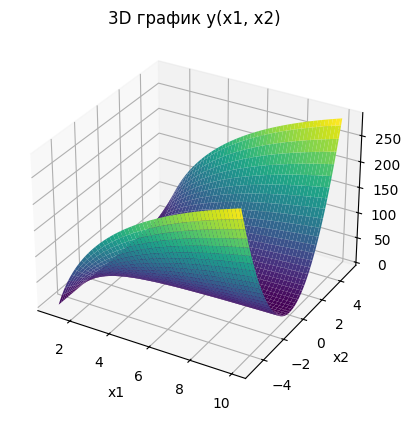

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Сетка
x1 = np.linspace(1, 10, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)

# Функция (пример: 5*log(x1+11)*x2^2)
Y = 5 * np.log(X1) * (X2**2)

# DataFrame
data = pd.DataFrame({
    "x1": X1.ravel(),
    "x2": X2.ravel(),
    "y": Y.ravel()
})
data.to_csv("data.csv", index=False)

# === 2D графики ===
# x2 = const
const_x2 = 0
subset_x2 = data.iloc[(data['x2']-const_x2).abs().argsort()[:50]]
plt.figure()
plt.scatter(subset_x2["x1"], subset_x2["y"], s=10, label=f"x2={const_x2}")
plt.xlabel("x1")
plt.ylabel("y")
plt.title("y(x1) при фиксированном x2")
plt.legend()
plt.grid(True)
plt.show()

# x1 = const
const_x1 = 2
subset_x1 = data.iloc[(data['x1']-const_x1).abs().argsort()[:50]]
plt.figure()
plt.scatter(subset_x1["x2"], subset_x1["y"], s=10, label=f"x1={const_x1}")
plt.xlabel("x2")
plt.ylabel("y")
plt.title("y(x2) при фиксированном x1")
plt.legend()
plt.grid(True)
plt.show()

# === Статистика ===
for col in ["x1", "x2", "y"]:
    print(f"{col}: mean={data[col].mean():.2f}, min={data[col].min():.2f}, max={data[col].max():.2f}")

# === Фильтрация ===
cond_data = data[(data["x1"] < data["x1"].mean()) | (data["x2"] < data["x2"].mean())]
cond_data.to_csv("filtered_data.csv", index=False)

# === 3D график ===
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X1, X2, Y, cmap="viridis")

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.set_title("3D график y(x1, x2)")

plt.show()
